## What is a Variable?

A variable is any characteristics, number, or quantity that can be measured or counted. For example:

- Age (21, 35, 62, ...)
- Gender (male, female)
- Income (GBP 20000, GBP 35000, GBP 45000, ...)
- House price (GBP 350000, GBP 570000, ...)
- Country of birth (China, Russia, Costa Rica, ...)
- Eye colour (brown, green, blue, ...)
- Vehicle make (Ford, VolksWagen, ...)

...are examples of variables. They are called 'variable' because the value they take may vary (and it usually does) in a population. 

Most variables in a data set can be classified into one of two major types:

**Numerical variables** and **categorical variables**

In this notebook, I will discuss Categorical variables

===================================================================================


## Categorical variables


The values of a categorical variable are selected from a group of **categories**, also called **labels**. Examples are gender (male or female) and marital status (never married, married, divorced or widowed).
Other examples of categorical variables include:

- Intended use of loan (debt-consolidation, car purchase, wedding expenses, ...)
- Mobile network provider (Vodafone, Orange, ...)
- Postcode

Categorical variables can be further categorised into ordinal and nominal variables.

### Ordinal categorical variables

Categorical variable in which categories can be meaningfully ordered are called ordinal. For example:

- Student's grade in an exam (A, B, C or Fail).
- Days of the week can be ordinal with Monday = 1 and Sunday = 7.
- Educational level, with the categories Elementary school,  High school, College graduate and PhD ranked from 1 to 4. 

### Nominal categorical variable

There isn't an intrinsic order of the labels. For example, country of birth (Argentina, England, Germany) is nominal. Other examples of nominal variables include:

- Postcode
- Vehicle make (Citroen, Peugeot, ...)

There is nothing that indicates an intrinsic order of the labels, and in principle, they are all equal.


**To be considered:**

Sometimes categorical variables are coded as numbers when the data are recorded (e.g. gender may be coded as 0 for males and 1 for females). The variable is still categorical, despite the use of numbers.

In a similar way, individuals in a survey may be coded with a number that uniquely identifies them (for example to avoid storing personal information for confidentiality). This number is really a label, and the variable then categorical. The number has no meaning other than making it possible to uniquely identify the observation (in this case the interviewed subject).

Ideally, when we work with a dataset in a business scenario, the data will come with a dictionary that indicates if the numbers in the variables are to be considered as categories or if they are numerical. And if the numbers are categoriies, the dictionary would explain what they intend to represent.

=============================================================================

## Real Life example: Peer to peer lending (Finance)

### Lending Club

**Lending Club** is a peer-to-peer Lending company based in the US. They match people looking to invest money with people looking to borrow money. When investors invest their money through Lending Club, this money is passed onto borrowers, and when borrowers pay their loans back, the capital plus the interest passes on back to the investors. It is a win for everybody as they can get typically lower loan rates and higher investor returns.

If you want to learn more about Lending Club follow this [link](https://www.lendingclub.com/).

The Lending Club dataset contains complete loan data for all loans issued through 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Features include credit scores, number of finance inquiries, address including zip codes and state, and collections among others. Collections indicates whether the customer has missed one or more payments and the team is trying to recover their money.

The file is a matrix of about 890 thousand observations and 75 variables. More detail on this dataset can be found in [Kaggle's website](https://www.kaggle.com/wendykan/lending-club-loan-data)

Let's go ahead and have a look at the variables!

====================================================================================================

To download the Lending Club loan book from Kaggle go to this [website](https://www.kaggle.com/wendykan/lending-club-loan-data)

Scroll down to the bottom of the page, and click on the link 'loan.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset.
Unzip it, and save it to a directory of your choice.

**Note that you need to be logged in to Kaggle in order to download the datasets**.

If you save it in the same directory from which you are running this notebook, then you can load it the same way I will load it below.

====================================================================================================

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's load the dataset with just a few columns and a few rows,
# to speed things up

use_cols = ['id', 'purpose', 'loan_status', 'home_ownership']

data = pd.read_csv(
    'loan.csv', usecols=use_cols).sample(
        10000, random_state=44)  # set a seed for reproducibility

data.head()

,id,home_ownership,loan_status,purpose
131079,5554979,RENT,Current,debt_consolidation
384935,16552323,OWN,Current,car
73585,8185454,RENT,Fully Paid,credit_card
660814,56180166,RENT,Current,debt_consolidation
349757,16772363,RENT,Current,credit_card


In [3]:
# let's inspect the variable home ownership,
# which indicates whether the borrowers own their home
# or if they are renting for example, among other things.

data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [10]:
data.home_ownership.value_counts()

MORTGAGE    4957
RENT        4055
OWN          986
OTHER          2
Name: home_ownership, dtype: int64

In [13]:
data['home_ownership'].value_counts()

MORTGAGE    4957
RENT        4055
OWN          986
OTHER          2
Name: home_ownership, dtype: int64

Text(0,0.5,'Number of customers')

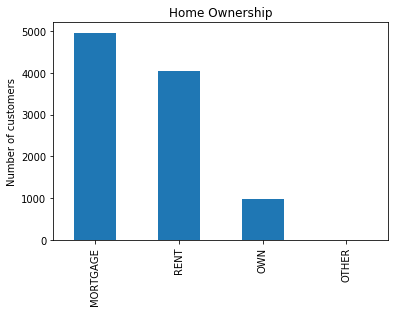

In [12]:
# let's make a bar plot, with the number of loans
# for each category of home ownership

fig = data['home_ownership'].value_counts().plot.bar()
fig.set_title('Home Ownership')
fig.set_ylabel('Number of customers')

Text(0,0.5,'Number of customers')

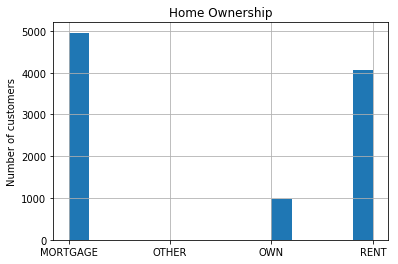

In [9]:
fig = data['home_ownership'].hist(bins=15)
fig.set_title('Home Ownership')
fig.set_ylabel('Number of customers')

The majority of the borrowers either own their house on a mortgage or rent their property. A few borrowers own their home completely. The category 'Other' seems to be empty. To be completely sure, we could print the numbers as below.

There are 2 borrowers that have other arrangements for their property. For example, they could live with their parents, or live in a hotel.

In [6]:
# the "purpose" variable is another categorical variable
# that indicates how the borrowers intend to use the
# money they are borrowing, for example to improve their
# house, or to cancel previous debt.

data.purpose.unique()

array(['debt_consolidation', 'car', 'credit_card', 'small_business',
       'house', 'moving', 'other', 'home_improvement', 'medical',
       'major_purchase', 'vacation', 'educational', 'wedding',
       'renewable_energy'], dtype=object)

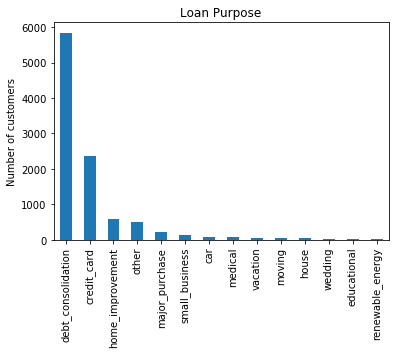

In [7]:
# let's make a bar plot with the number of borrowers
# within each category

fig = data['purpose'].value_counts().plot.bar()
fig.set_title('Loan Purpose')
fig.set_ylabel('Number of customers')

The majority of the borrowers intend to use the loan for 'debt consolidation' or to repay their 'credit cards'. This is quite a common among borrowers. What the borrowers intend to do is, to consolidate all the debt that they have on different financial items, in one single debt, the new loan that they will take from Lending Club in this case. This loan will usually provide an advantage to the borrower, either in the form of lower interest rates than a credit card, for example, or longer repayment period.

In [8]:
# let's look at one additional categorical variable,
# "loan status", which represents the current status
# of the loan. This is whether the loan is still active
# and being repaid, or if it was defaulted,
# or if it was fully paid among other things.

data.loan_status.unique()

array(['Current', 'Fully Paid', 'Default', 'Charged Off',
       'Late (31-120 days)', 'Issued', 'In Grace Period',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off',
       'Late (16-30 days)'], dtype=object)

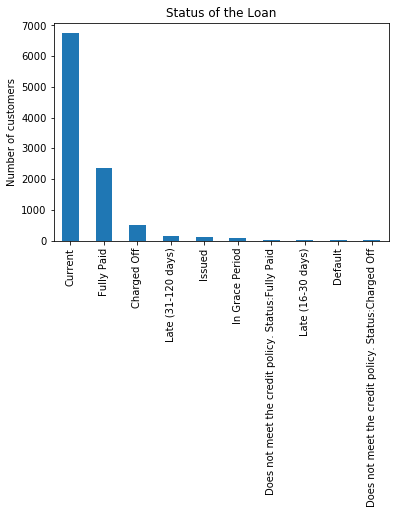

In [9]:
# let's make a bar plot with the number of borrowers
# within each category

fig = data['loan_status'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')

We can see that the majority of the loans are active (current) and a big number have been 'Fully paid'. The remaining labels have the following meaning:
- Late (16-30 days): customer missed a payment
- Late (31-120 days): customer is behind in payments for more than a month
- Charged off: the company declared that they will not be able to recover the money for that loan ( money is typically lost)
- Issued: loan was granted but money not yet sent to borrower
- In Grace Period: window of time agreed with customer to wait for payment, usually, when customer is behind in their payments

In [10]:
# finally, let's look at a variable that is numerical,
# but its numbers have no real meaning, and therefore
# should be better considered as a categorical one.

data['id'].head()

131079     5554979
384935    16552323
73585      8185454
660814    56180166
349757    16772363
Name: id, dtype: int64

In this case, each id represents one customer. This number is assigned in order to identify the customer if needed, while 
maintaining confidentiality.

In [11]:
# The variable has as many different id values as customers,
# in this case 10000, because we loaded randomly 
# 10000 rows/customers from the original dataset.

len(data['id'].unique())

10000

In [17]:
len(data['id'])

10000

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**